# 로지스틱 회귀의 성능평가 지표

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from helper.util import *
from helper.plot import *
from helper.analysis import *
from helper.classification import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'], info=False)

## #02. 데이터 전처리 및 로지스틱 분석

### [1] 0값을 평균으로 대체

In [3]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)

df2 = my_replace_missing_value(df)
my_pretty_table(df2.describe().T)

+--------------------------+---------+----------+----------+-------+---------+---------+---------+-------+
|                          |   count |     mean |      std |   min |     25% |     50% |     75% |   max |
|--------------------------+---------+----------+----------+-------+---------+---------+---------+-------|
| Pregnancies              |     768 |  3.84505 |  3.36958 |     0 |       1 |       3 |       6 |    17 |
| Glucose                  |     768 |  121.687 |  30.4359 |    44 |   99.75 |     117 |  140.25 |   199 |
| BloodPressure            |     768 |  72.4052 |  12.0963 |    24 |      64 | 72.2026 |      80 |   122 |
| SkinThickness            |     768 |  29.1534 |  8.79094 |     7 |      25 | 29.1534 |      32 |    99 |
| Insulin                  |     768 |  155.548 |  85.0211 |    14 |   121.5 | 155.548 | 155.548 |   846 |
| BMI                      |     768 |  32.4575 |  6.87515 |  18.2 |    27.5 |    32.4 |    36.6 |  67.1 |
| DiabetesPedigreeFunction |     768 

### [3] 스케일링

In [4]:
df3 = my_standard_scaler(df2, yname='Outcome')
my_pretty_table(df3.head())

+----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   SkinThickness |      Insulin |       BMI |   DiabetesPedigreeFunction |        Age |   Outcome |
|----+---------------+-----------+-----------------+-----------------+--------------+-----------+----------------------------+------------+-----------|
|  0 |      0.639947 |  0.865108 |      -0.0335182 |        0.665502 | -3.34508e-16 |  0.166292 |                   0.468492 |      1.426 |         1 |
|  1 |     -0.844885 |  -1.20616 |       -0.529859 |      -0.0174634 | -3.34508e-16 | -0.852531 |                  -0.365061 |  -0.190672 |         0 |
|  2 |       1.23388 |   2.01581 |       -0.695306 |     8.08794e-16 | -3.34508e-16 |  -1.33283 |                   0.604397 |  -0.105584 |         1 |
|  3 |     -0.844885 |  -1.07465 |       -0.529859 |       -0.700429 |    -0.724389 | -0

### [4] 데이터 분할

In [5]:
x_train, x_test, y_train, y_test = my_train_test_split(df3, yname='Outcome', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [4] 로지스틱 분석 모형

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.772065 |
| 10 |     1 | l2        |          0.767186 |
| 13 |    10 | l2        |          0.765547 |
| 16 |   100 | l2        |          0.765547 |
|  4 |  0.01 | l2        |          0.755738 |
|  1 | 0.001 | l2        |          0.657977 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.258547 |     0.344391 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.775244 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과

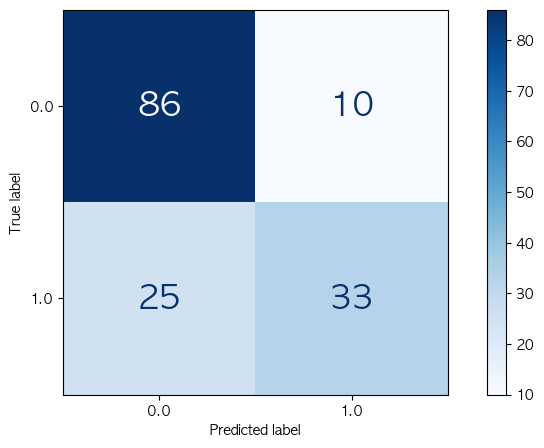


[ROC/PR Curve]


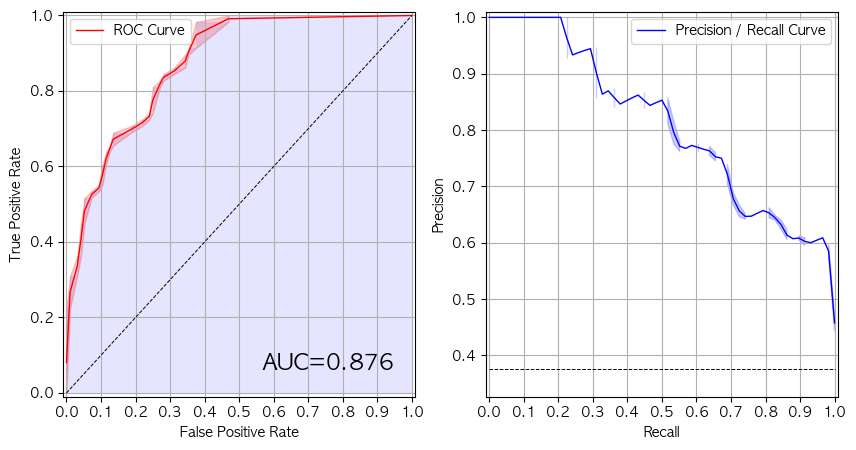


[학습곡선]


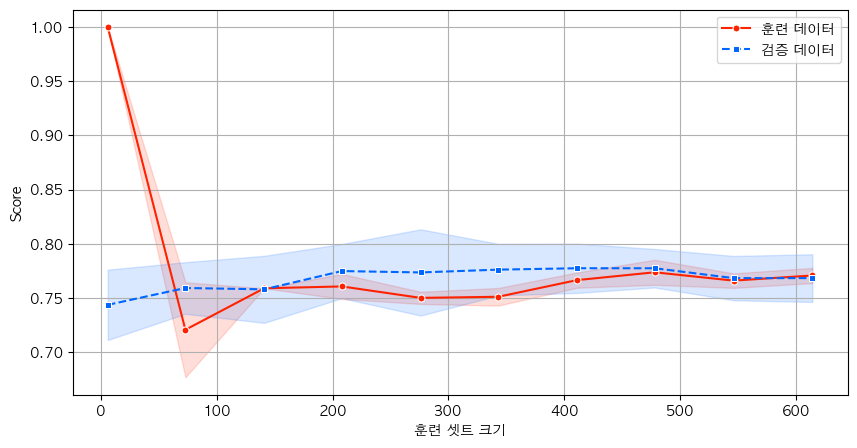

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [6]:
estimator = my_logistic_classification(x_train, y_train, x_test, y_test)
estimator

## #03. 로지스틱의 예측값

### [1] 예측 결과값

`0`, `1`중에서 예측 결과를 의미

In [7]:
y_pred = estimator.predict(x_test)
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.])

### [2] 위,양성 확률

`0`으로 분류될 확률과 `1`로 분류될 확률을 의미

In [8]:
y_pred_proba = estimator.predict_proba(x_test)
y_pred_proba[:5]

array([[0.14582134, 0.85417866],
       [0.63268592, 0.36731408],
       [0.42262264, 0.57737736],
       [0.9497178 , 0.0502822 ],
       [0.90292842, 0.09707158]])

보통은 `1`로 분류될 확률만 선택적으로 추출함

In [9]:
y_pred_proba_1 = estimator.predict_proba(x_test)[:,1]
y_pred_proba_1[:5]

array([0.85417866, 0.36731408, 0.57737736, 0.0502822 , 0.09707158])

## #04. 시각화 결과

### [1] 혼동행렬

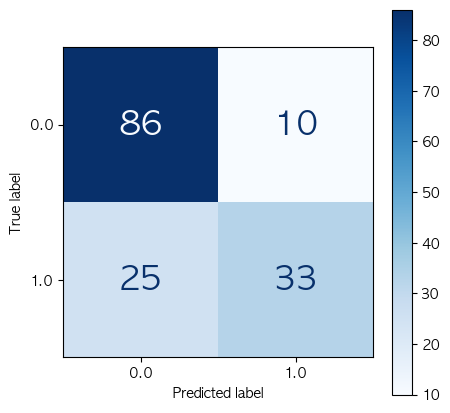

In [10]:
my_confusion_matrix(y_test, y_pred, figsize=(5, 5), dpi=100)

### [2] ROC Curve

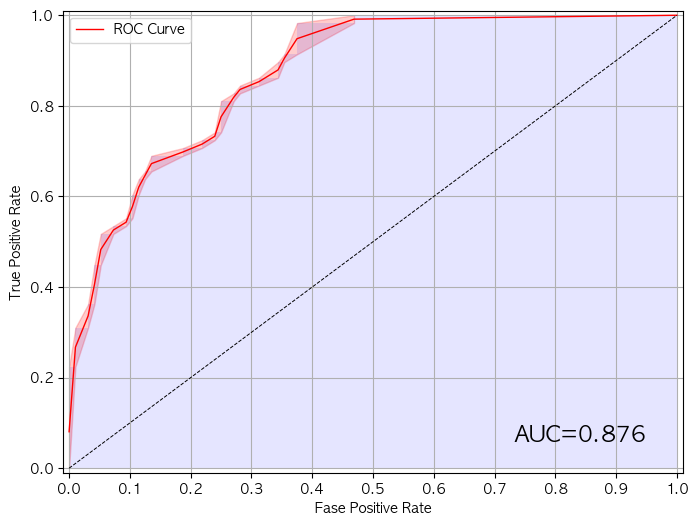

In [11]:
my_roc_curve(y_test, y_pred_proba_1, dpi=100)

### [3] Precision / Recall Curve

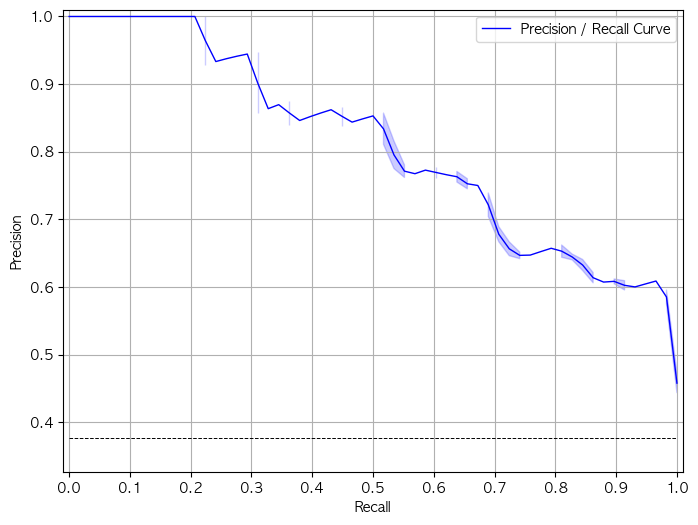

In [12]:
my_pr_curve(y_test, y_pred_proba_1, dpi=100)

### [4] ROC Curve + Precision / Recall Curve

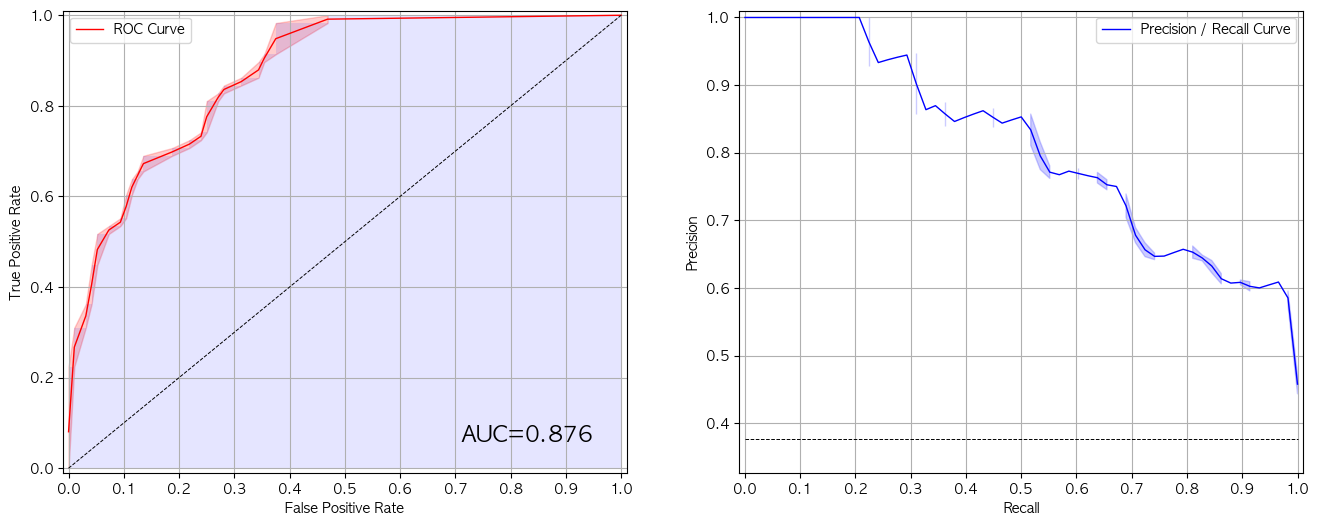

In [13]:
my_roc_pr_curve(y_test, y_pred_proba_1, dpi=100)

### [4] 학습곡선

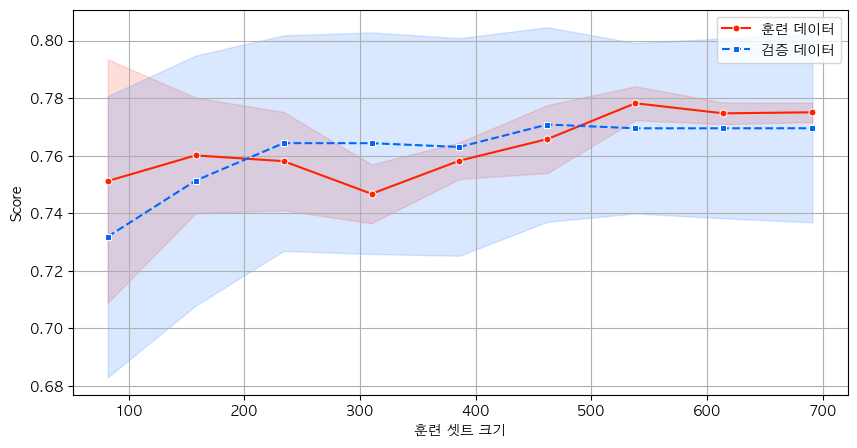

In [14]:
my_learing_curve(estimator, data=origin, yname='Outcome', dpi=100)

## #05. 성능평가 지표

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.258547 |     0.344391 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.775244 |     0.772727 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision)       |     0.730769 |     0.767442 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)          |     0.542857 |     0.568966 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout)       |      0.10396 |     0.104167 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)             |      0.89604 |     0.895833 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score                |     0.622951 |     0.653465 | 정밀도와 재

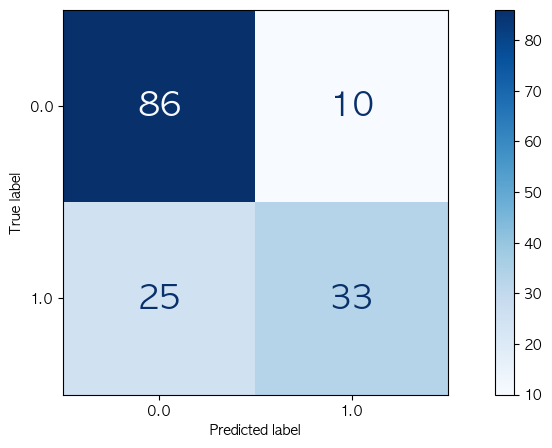


[ROC/PR Curve]


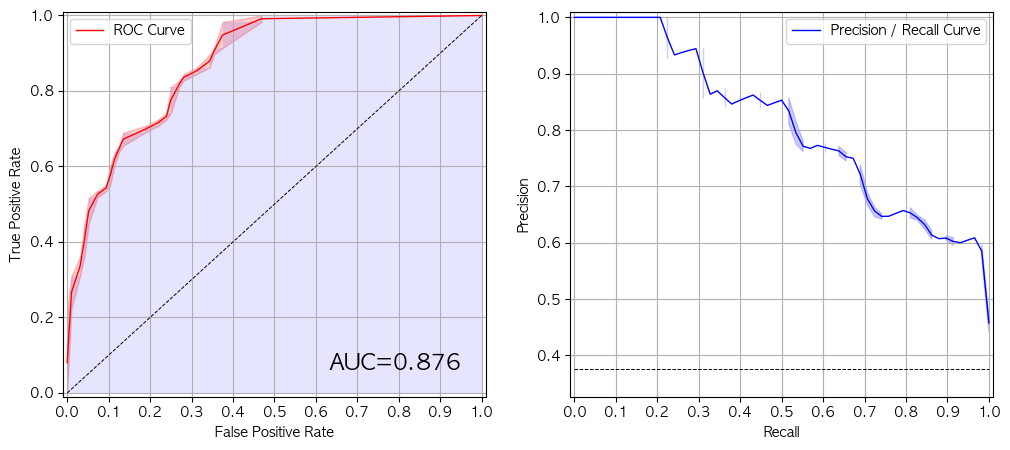


[학습곡선]


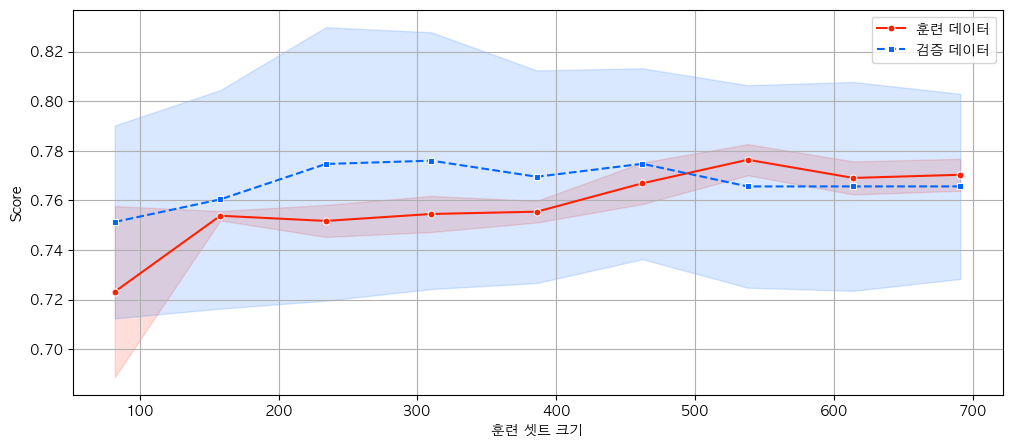

In [15]:
my_classification_result(estimator, x_train, y_train, x_test, y_test)